<a href="https://colab.research.google.com/github/saurabhdaund76/KNN-classifier-implementation/blob/main/KNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/drive/MyDrive/ML projects/Classified Data.csv', index_col=0)

In [7]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [8]:
# X = df.iloc[:,:-1]
# y = df['TARGET CLASS']

**To bring all features in one scale we will use standered scaler**

In [27]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()

In [31]:
# Scaler.fit(X)
scaler.fit(df.drop('TARGET CLASS',axis=1))


StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
# scaled_x = Scaler.transform(X)
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))


In [33]:
# df_features = pd.DataFrame(X)

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [34]:
from sklearn.model_selection import train_test_split


In [37]:
# X_train,X_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=1) # initial value of k=1

In [40]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
# predictions and evaluting the matrix
from sklearn.metrics import classification_report , confusion_matrix

In [43]:
print(confusion_matrix(y_test,pred))

[[145  16]
 [ 10 129]]


In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       161
           1       0.89      0.93      0.91       139

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [52]:
print(error_rate)

[0.08666666666666667, 0.07, 0.07, 0.06, 0.06666666666666667, 0.06, 0.06333333333333334, 0.056666666666666664, 0.07333333333333333, 0.06666666666666667, 0.07333333333333333, 0.07333333333333333, 0.07, 0.06, 0.06666666666666667, 0.06333333333333334, 0.06666666666666667, 0.06333333333333334, 0.06333333333333334, 0.06666666666666667, 0.06, 0.06333333333333334, 0.07, 0.06666666666666667, 0.06333333333333334, 0.056666666666666664, 0.06333333333333334, 0.056666666666666664, 0.06, 0.05, 0.07, 0.06333333333333334, 0.06666666666666667, 0.06333333333333334, 0.07, 0.07, 0.07, 0.07, 0.06666666666666667]


Text(0, 0.5, 'Error Rate')

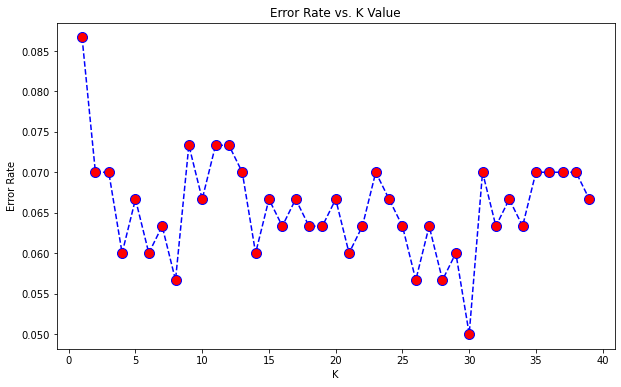

In [53]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [54]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print("with k=1")
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


with k=1
[[145  16]
 [ 10 129]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       161
           1       0.89      0.93      0.91       139

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [59]:
# now with k=30 will be overfitting case

knn = KNeighborsClassifier(n_neighbors=28)
knn.fit(X_train,y_train)
pred1 = knn.predict(X_test)

print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[149  12]
 [  5 134]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       161
           1       0.92      0.96      0.94       139

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

